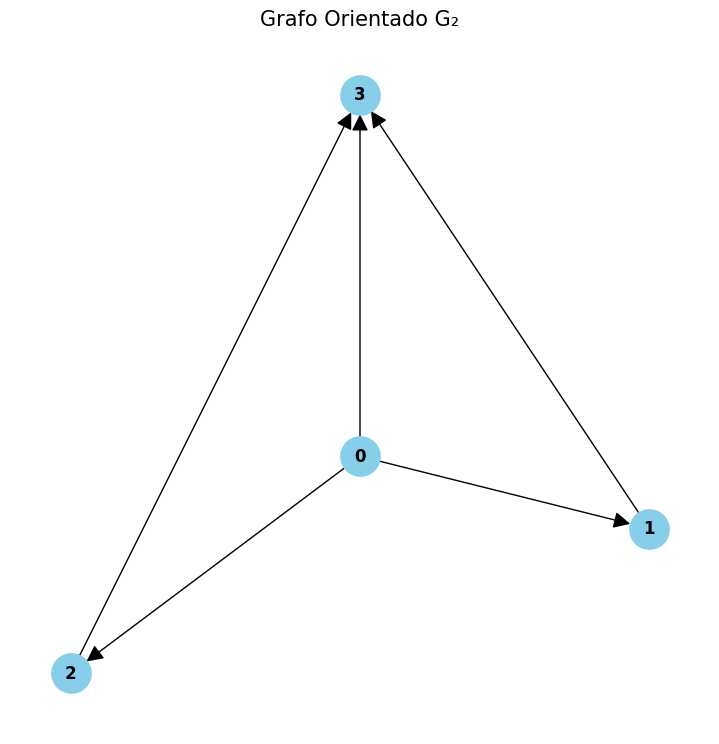

In [5]:
#GRAFO ORIENTADO

import networkx as nx
import matplotlib.pyplot as plt

# 1. Criar um objeto de Grafo Orientado (DiGraph)
G2 = nx.DiGraph()

# 2. Definir e adicionar os vértices (nós)
vertices = [0, 1, 2, 3]
G2.add_nodes_from(vertices)

# 3. Definir e adicionar os arcos (arestas direcionadas)
arcos = [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]
G2.add_edges_from(arcos)

# 4. Definir a posição dos nós para replicar a imagem
# Este passo é opcional, mas ajuda a manter a mesma aparência visual.
pos = {0: (0.4, 0.3), 1: (0.8, 0.2), 2: (0, 0), 3: (0.4, 0.8)}

# 5. Desenhar e exibir o grafo
plt.figure(figsize=(7, 7)) # Define o tamanho da imagem gerada

nx.draw(G2,
        pos,
        with_labels=True,      # Mostra os números dos nós
        node_color='skyblue',  # Define a cor dos nós
        node_size=800,         # Define o tamanho dos nós
        font_size=12,          # Define o tamanho da fonte
        font_weight='bold',    # Deixa a fonte em negrito
        arrowsize=25)          # Define o tamanho da seta

plt.title("Grafo Orientado G₂", size=15)
plt.show()

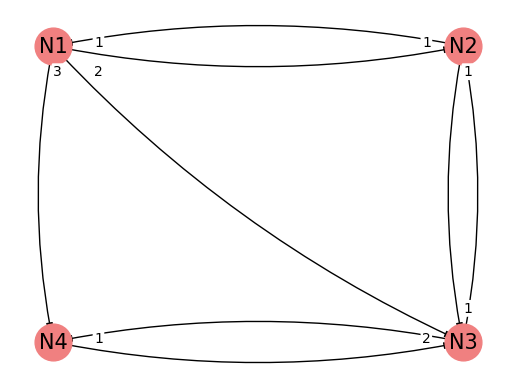

In [ ]:
#GRAFO ORDENADO

import networkx as nx
import matplotlib.pyplot as plt

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Foi mudado as variáveis e algumas partes do código para não ficar idêntico.

# Adiciona as conexões (arestas) entre os vértices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Adiciona uma aresta paralela de N2 para N3
meu_grafo.add_edge('N2', 'N3', weight=1) 

# Define as coordenadas para o layout dos vértices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# Desenha os componentes do grafo na tela
fig, ax = plt.subplots()

# Desenha os nós (vértices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os rótulos dentro dos nós
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenhá-las com curvatura
# A curvatura ajuda a distinguir arestas de ida e volta ou paralelas
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao)

# Cria um dicionário com os pesos para usar como rótulos nas arestas
# Nota: Para multigrafos, isso armazena apenas o peso da última aresta encontrada entre um par de nós
rotulos_arestas = {(origem, destino): data['weight'] 
                   for origem, destino, data in meu_grafo.edges(data=True)}

# Desenha os rótulos de peso perto do início de cada aresta
for (origem, destino), peso in rotulos_arestas.items():
    # Calcula a posição do texto um pouco deslocada da origem na direção do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    
    pos_texto = (x_origem * 0.9 + x_destino * 0.1, 
                 y_origem * 0.9 + y_destino * 0.1)

    # Adiciona o texto do peso com uma caixa de fundo branca para legibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Remove os eixos x e y para uma aparência mais limpa
plt.axis('off')
# Mostra o gráfico final
plt.show()